In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os


In [ ]:
# Monitored week March
df = pd.read_csv(r"D:\GitHub\IIT-PhD\.git\Field Study\CoHeating Workbook.csv")

# Preprocess House A
df_a1 = df[['A_Delta T', 'A_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)']].dropna()
a_dt = df_a1['A_Delta T'].tolist()
a_q = df_a1['A_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)'].tolist()

# Preprocess House R
df_r1 = df[['R_Delta T', 'R_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)']].dropna()
r_dt = df_r1['R_Delta T'].tolist()
r_q = df_r1['R_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)'].tolist()

# Preprocess House T
df_t1 = df[['T_Delta T', 'T_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)']].dropna()
t_dt = df_t1['T_Delta T'].tolist()
t_q = df_t1['T_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)'].tolist()

In [5]:
# Extreme week

df2 = pd.read_csv(r"D:\GitHub\IIT-PhD\.git\Field Study\CoHeating Workbook_ExtremeWeek.csv")

# Preprocess House A
df2_a1 = df2[['A_Delta T', 'A_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)']].dropna()
a_dt2 = df2_a1['A_Delta T'].tolist()
a_q2 = df2_a1['A_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)'].tolist()

# Preprocess House R
df2_r1 = df2[['R_Delta T', 'R_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)']].dropna()
r_dt2 = df2_r1['R_Delta T'].tolist()
r_q2 = df2_r1['R_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)'].tolist()

# Preprocess House T
df2_t1 = df2[['T_Delta T', 'T_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)']].dropna()
t_dt2 = df2_t1['T_Delta T'].tolist()
t_q2 = df2_t1['T_COHEATINGHEATER:Baseboard Total Heating Rate [W](Hourly)'].tolist()

In [ ]:
# Monitored week March

m_a1 = np.polyfit(a_dt, a_q, 1)
m_r1 = np.polyfit(r_dt, r_q, 1)
m_t1 = np.polyfit(t_dt, t_q, 1)

p_a1 = np.poly1d(m_a1)
p_r1 = np.poly1d(m_r1)
p_t1 = np.poly1d(m_t1)

print(f"House A Slope: {m_a1[0]:.1f} W/°C")
print(f"House R Slope: {m_r1[0]:.1f} W/°C")
print(f"House T Slope: {m_t1[0]:.1f} W/°C")

print(p_a1)
print(p_r1)
print(p_t1)

House A Slope: 298.6 W/°C
House R Slope: 224.0 W/°C
House T Slope: 123.6 W/°C
 
298.6 x + 354.2
 
224 x + 366.9
 
123.6 x + 122.8


In [6]:
# Extreme week
m_a2 = np.polyfit(a_dt2, a_q2, 1)
m_r2 = np.polyfit(r_dt2, r_q2, 1)
m_t2 = np.polyfit(t_dt2, t_q2, 1)

p_a2 = np.poly1d(m_a2)
p_r2 = np.poly1d(m_r2)
p_t2 = np.poly1d(m_t2)

print(f"House A Slope: {m_a2[0]:.1f} W/°C")
print(f"House R Slope: {m_r2[0]:.1f} W/°C")
print(f"House T Slope: {m_t2[0]:.1f} W/°C")

print(p_a2)
print(p_r2)
print(p_t2)

House A Slope: 312.1 W/°C
House R Slope: 260.5 W/°C
House T Slope: 184.7 W/°C
 
312.1 x + 414.5
 
260.5 x - 917.6
 
184.7 x - 1791


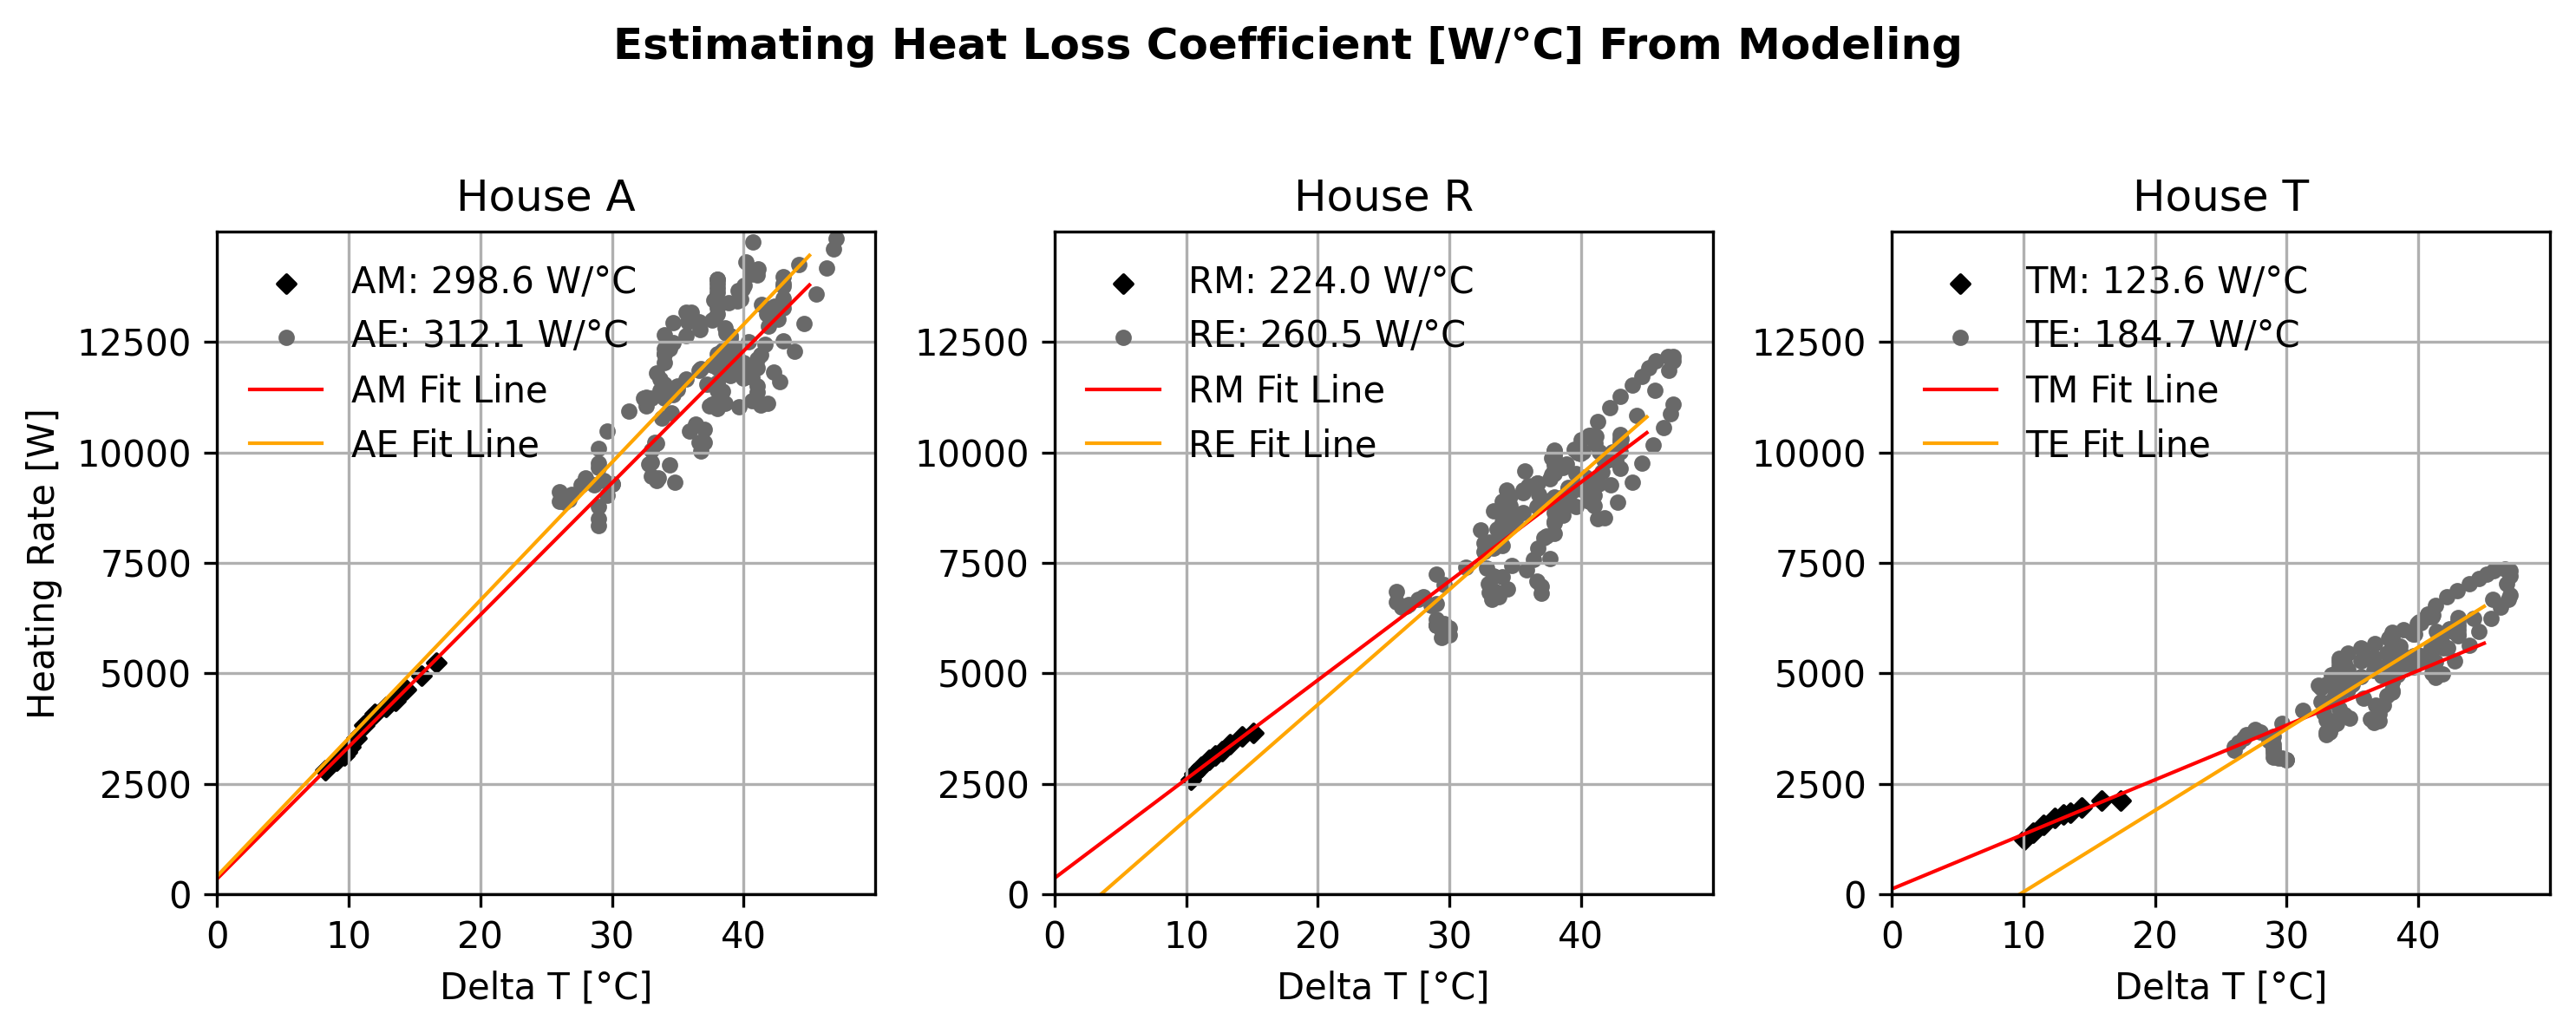

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), dpi=300)
marker_size = 6
legend_fontsize = 10

# House A
axs[0].scatter(a_dt, a_q, label=f'AM: {round(m_a1[0], 1)} W/°C', s=marker_size**1.4, marker='D', color='black')
axs[0].scatter(a_dt2, a_q2, label=f'AE: {round(m_a2[0], 1)} W/°C', s=marker_size**1.4, marker='o', color='dimgray')
axs[0].plot((np.arange(0, 50, 5)), p_a1(np.arange(0, 50, 5)), color='red', lw=1, label='AM Fit Line')
axs[0].plot((np.arange(0, 50, 5)), p_a2(np.arange(0, 50, 5)), color='orange', lw=1, label='AE Fit Line')
axs[0].axhline(0, color='black', lw=0.8)
axs[0].set_title('House A')
axs[0].set_ylabel('Heating Rate [W]')

# House R
axs[1].scatter(r_dt, r_q, label=f'RM: {round(m_r1[0], 1)} W/°C', s=marker_size**1.4, marker='D', color='black')
axs[1].scatter(r_dt2, r_q2, label=f'RE: {round(m_r2[0], 1)} W/°C', s=marker_size**1.4, marker='o', color='dimgray')
axs[1].plot((np.arange(0, 50, 5)), p_r1(np.arange(0, 50, 5)), color='red', lw=1, label='RM Fit Line')
axs[1].plot((np.arange(0, 50, 5)), p_r2(np.arange(0, 50, 5)), color='orange', lw=1, label='RE Fit Line')
axs[1].axhline(0, color='black', lw=0.8)
axs[1].set_title('House R')


# House T
axs[2].scatter(t_dt, t_q, label=f'TM: {round(m_t1[0], 1)} W/°C', s=marker_size**1.4, marker='D', color='black')
axs[2].scatter(t_dt2, t_q2, label=f'TE: {round(m_t2[0], 1)} W/°C', s=marker_size**1.4, marker='o', color='dimgray')
axs[2].plot((np.arange(0, 50, 5)), p_t1(np.arange(0, 50, 5)), color='red', lw=1, label='TM Fit Line')
axs[2].plot((np.arange(0, 50, 5)), p_t2(np.arange(0, 50, 5)), color='orange', lw=1, label='TE Fit Line')
axs[2].axhline(0, color='black', lw=0.8)
axs[2].set_title('House T')

# Formatting
for ax in axs:
    ax.set_xlim([0, 50])
    ax.set_ylim([0, 15000])
    ax.set_xlabel('Delta T [°C]')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.legend(fontsize=legend_fontsize, frameon=False, loc='upper left')
    ax.grid(True)

axs[0].set_xticks(np.arange(0, 50, 10))  # House R
axs[1].set_xticks(np.arange(0, 50, 10))  # House R
axs[2].set_xticks(np.arange(0, 50, 10))  # House R
axs[0].set_yticks(np.arange(0, 15000, 2500))  # House T
axs[1].set_yticks(np.arange(0, 15000, 2500))  # House R
axs[2].set_yticks(np.arange(0, 15000, 2500))  # House T

fig.suptitle('Estimating Heat Loss Coefficient [W/°C] From Modeling', fontsize=12, weight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
